<a href="https://colab.research.google.com/github/Lean-IQ/Market-Trend-Analysis/blob/main/Trend_Evaluation%2C_Analysis%2C_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trend Evaluation, Analysis, and Visualization

**Dependencies**

*   vaderSentiment: For sentiment analysis.
*   feedparser: For parsing RSS feeds.eintrag
*   googletrans: For translating text.
*   google.colab: For mounting Google Drive (if running on Google Colab).



In [ ]:
pip install feedparser gdown langdetect googletrans vaderSentiment googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 863.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for googletr

**Features**

*   Extracts news headlines and links from RSS feeds based on keywords.
*   Normalizes news items to English.
*   Performs sentiment analysis on news headlines using VADER sentiment analyzer.
*   Saves results to a CSV file.


**Configuration**

*   The script requires a CSV file containing keywords. Specify the path to this file in the keywords_file_path variable.

*   Results are saved to a CSV file. Specify the desired path in the csv_file_path variable.


**Contributing**

Contributions are welcome! Please fork the repository, create a new branch, and
submit a pull request. For major changes, open an issue first to discuss potential improvements.

**License**

This project is licensed under the MIT License. See the LICENSE file for details. (Annex)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import feedparser
import csv
from datetime import datetime, timedelta
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def download_keywords_csv(file_path, output_path):
    """
    Check if the keywords CSV file exists, if not, print a message.

    Args:
        file_path (str): The path to the keywords CSV file.
        output_path (str): The output path for the downloaded CSV file.

    Returns:
        str: The path to the downloaded CSV file if it exists, otherwise None.
    """
    if os.path.exists(file_path):
        return file_path
    else:
        print("File does not exist.")
        return None

def extract_titles_and_links_with_date(rss_url):
    """
    Extract titles, links, and dates from the given RSS feed URL.

    Args:
        rss_url (str): The URL of the RSS feed.

    Returns:
        list: A list of tuples containing title, link, and date.
    """
    try:
        # Parse the RSS feed
        feed = feedparser.parse(rss_url)

        # Extract titles, links, and dates
        titles_links_dates = [(entry.title, entry.link, entry.published) for entry in feed.entries]

        return titles_links_dates
    except Exception as e:
        print(f"Error: {e}")
        return None

def save_to_csv(data, csv_file_path):
    """
    Save data to the CSV file.

    Args:
        data (list): The data to save to the CSV file.
        csv_file_path (str): The path to the CSV file.
    """
    try:
        # Open the CSV file in append mode
        with open(csv_file_path, 'a', newline='', encoding='utf-8') as csv_file:
            # Create a CSV writer
            csv_writer = csv.writer(csv_file)

            # Write data to CSV
            csv_writer.writerows(data)

        print(f"Data successfully appended to: {csv_file_path}")
    except Exception as e:
        print(f"Error appending to CSV: {e}")

def main():
    # Specify the path to the keywords CSV file
    keywords_file_path = '/content/drive/My Drive/DATA/keyword.csv'

    # Specify the desired CSV file path in Google Drive for saving headlines
    csv_file_path = '/content/drive/My Drive/DATA/results_sentiment.csv'

    # Check if the keywords file exists
    keywords_file_path = download_keywords_csv(keywords_file_path, '/content/keyword.csv')

    # Load keywords from the downloaded CSV file
    if keywords_file_path:
        with open(keywords_file_path, 'r') as keywords_file:
            reader = csv.reader(keywords_file)
            next(reader)  # Skip the header
            keywords = [row[0] for row in reader]

        # Write headers to the CSV file
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(['Keyword', 'Title', 'Date', 'Link', 'Sentiment Polarity', 'Sentiment Compound'])

        # Loop through each keyword
        for keyword in keywords:
            # Replace spaces with '+' in the keyword for the RSS feed URL
            keyword_for_url = keyword.replace(' ', '+')

            # Construct the RSS feed URL
            rss_feed_url = f'https://news.google.com/rss/search?q={keyword_for_url}'

            # Call the function to extract titles, links, and dates
            result = extract_titles_and_links_with_date(rss_feed_url)

            if result:
                # Filter entries that are older than 24 hours
                current_time = datetime.now()
                filtered_result = [(title, link, date) for title, link, date in result if (current_time - datetime.strptime(date, "%a, %d %b %Y %H:%M:%S %Z")).total_seconds() <= 86400]

                # Prepare data for CSV with formatted date and sentiment analysis
                data_for_csv = []
                for title, link, date in filtered_result:
                    sentiment_scores = analyzer.polarity_scores(title.replace('.', ','))
                    polarity_score = f"{sentiment_scores['pos'] - sentiment_scores['neg']:.2f}".replace('.', ',')
                    compound_score = f"{sentiment_scores['compound']:.2f}".replace('.', ',')
                    data_for_csv.append([keyword, title, datetime.strptime(date, "%a, %d %b %Y %H:%M:%S %Z").strftime("%d.%m.%Y"), link, polarity_score, compound_score])

                # Save data to CSV
                save_to_csv(data_for_csv, csv_file_path)
            else:
                print(f"Extraction failed for keyword: {keyword}")

if __name__ == "__main__":
    main()


# Version 1.0, Prototype

In [ ]:
# NEWS EXTRACT - HEADLINES AND LINKS BASED ON KEYWORD LIST, ALL NORMALIZED IN ENGLISH, INCLUDING SENTIMENT ANALYSIS #

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import feedparser
import csv
from datetime import datetime, timedelta
from google.colab import drive
import gdown
import os

# Mount Google Drive
drive.mount('/content/drive')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def download_keywords_csv(file_path, output_path):
    # Check if the file exists
    if os.path.exists(file_path):
        return file_path
    else:
        print("File does not exist.")
        return None

def extract_titles_and_links_with_date(rss_url):
    try:
        # Parse the RSS feed
        feed = feedparser.parse(rss_url)

        # Extract titles, links, and dates
        titles_links_dates = [(entry.title, entry.link, entry.published) for entry in feed.entries]

        return titles_links_dates
    except Exception as e:
        print(f"Error: {e}")
        return None

def save_to_csv(data, csv_file_path):
    try:
        # Open the CSV file in append mode
        with open(csv_file_path, 'a', newline='', encoding='utf-8') as csv_file:
            # Create a CSV writer
            csv_writer = csv.writer(csv_file)

            # Write data to CSV
            csv_writer.writerows(data)

        print(f"Data successfully appended to: {csv_file_path}")
    except Exception as e:
        print(f"Error appending to CSV: {e}")

def main():
    # Specify the path to the keywords CSV file
    keywords_file_path = '/content/drive/My Drive/DATA/keyword.csv'

    # Specify the desired CSV file path in Google Drive for saving headlines
    csv_file_path = '/content/drive/My Drive/DATA/results_sentiment.csv'

    # Check if the keywords file exists
    keywords_file_path = download_keywords_csv(keywords_file_path, '/content/keyword.csv')

    # Load keywords from the downloaded CSV file
    if keywords_file_path:
        with open(keywords_file_path, 'r') as keywords_file:
            reader = csv.reader(keywords_file)
            next(reader)  # Skip the header
            keywords = [row[0] for row in reader]

        # Write headers to the CSV file
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(['Keyword', 'Title', 'Date', 'Link', 'Sentiment Polarity', 'Sentiment Compound'])

        # Loop through each keyword
        for keyword in keywords:
            # Replace spaces with '+' in the keyword for the RSS feed URL
            keyword_for_url = keyword.replace(' ', '+')

            # Construct the RSS feed URL
            rss_feed_url = f'https://news.google.com/rss/search?q={keyword_for_url}'

            # Call the function to extract titles, links, and dates
            result = extract_titles_and_links_with_date(rss_feed_url)

            if result:
                # Filter entries that are older than 24 hours
                current_time = datetime.now()
                filtered_result = [(title, link, date) for title, link, date in result if (current_time - datetime.strptime(date, "%a, %d %b %Y %H:%M:%S %Z")).total_seconds() <= 86400]

                # Prepare data for CSV with formatted date and sentiment analysis
                data_for_csv = []
                for title, link, date in filtered_result:
                    sentiment_scores = analyzer.polarity_scores(title.replace('.', ','))
                    polarity_score = f"{sentiment_scores['pos'] - sentiment_scores['neg']:.2f}".replace('.', ',')
                    compound_score = f"{sentiment_scores['compound']:.2f}".replace('.', ',')
                    data_for_csv.append([keyword, title, datetime.strptime(date, "%a, %d %b %Y %H:%M:%S %Z").strftime("%d.%m.%Y"), link, polarity_score, compound_score])

                # Save data to CSV
                save_to_csv(data_for_csv, csv_file_path)
            else:
                print(f"Extraction failed for keyword: {keyword}")

if __name__ == "__main__":
    main()

Mounted at /content/drive
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sentiment.csv
Data successfully appended to: /content/drive/My Drive/DATA/results_sent

# Visualization: Multidimensional Scaling (MDS)

**Dependencies**

*   numpy: For numerical operations.
*   pandas: For data manipulation and analysis.
*   vaderSentiment: For sentiment analysis.
*   scikit-learn: For machine learning algorithms, including Multidimensional Scaling (MDS).
*   matplotlib: For data visualization.
*   google.colab: For mounting Google Drive (if running on Google Colab).
*   nltk: For natural language processing tasks, including stopwords removal and lemmatization.


**Features**

*   Preprocesses sentiment results by removing stopwords and lemmatizing news headlines.
*   Applies Multidimensional Scaling (MDS) to visualize sentiment scores in a two-dimensional space.

**Configuration**

Ensure the sentiment results CSV file (results_sentiment.csv) is located in Google Drive. Modify the csv_file_path variable to specify the correct path if needed.


**Contributing**

Contributions are welcome! Please fork the repository, create a new branch, and submit a pull request. For major changes, open an issue first to discuss potential improvements.

**License**

This project is licensed under the MIT License. See the LICENSE file for details. (Annex)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


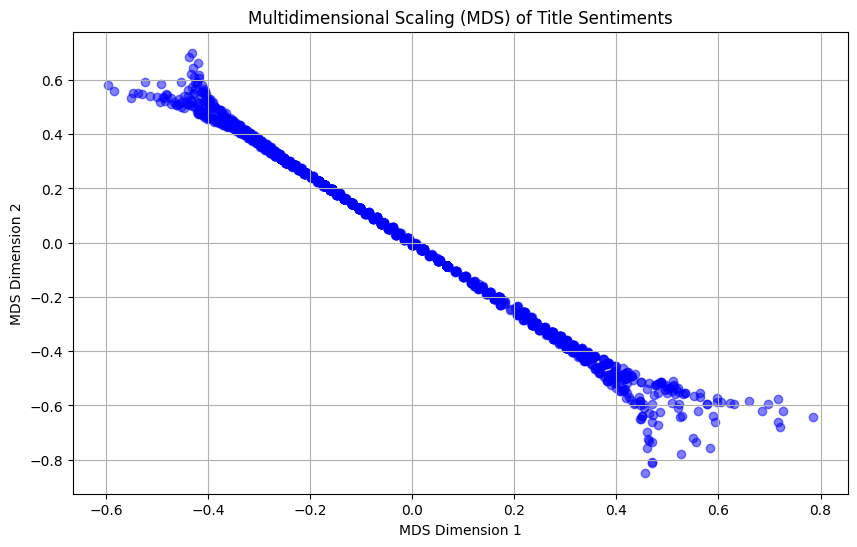

In [ ]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from google.colab import drive
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Mount Google Drive
drive.mount('/content/drive')

# Load NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the CSV file containing the sentiment results
csv_file_path = '/content/drive/MyDrive/DATA/results_sentiment.csv'
df = pd.read_csv(csv_file_path)

# Ensure 'Title' column is present
if 'Title' not in df.columns:
    raise ValueError("The 'Title' column is not present in the DataFrame.")

# Define stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the titles: remove stopwords and lemmatize
def preprocess_text(title):
    tokens = word_tokenize(title.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Title' column
df['Processed_Title'] = df['Title'].apply(preprocess_text)

# Perform sentiment analysis on the preprocessed titles
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(title)['compound'] for title in df['Processed_Title']]
sentiments_array = np.array(sentiments).reshape(-1, 1)

# Perform Multidimensional Scaling (MDS) on sentiment scores
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
mds_transformed = mds.fit_transform(sentiments_array)

# Plot the titles based on MDS transformation
plt.figure(figsize=(10, 6))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c='blue', alpha=0.5)
plt.title('Multidimensional Scaling (MDS) of Title Sentiments')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

# Visualization: Hierarchical Clustering

**Dependencies**


*   numpy: For numerical operations.
*   pandas: For data manipulation and analysis.
*   vaderSentiment: For sentiment analysis.
*   matplotlib: For data visualization.
*   google.colab: For mounting Google Drive (if running on Google Colab).
*   nltk: For natural language processing tasks, including stopwords removal and lemmatization.
*   scikit-learn: For machine learning algorithms, including hierarchical clustering.


**Features**


*   Preprocesses sentiment results by removing stopwords and lemmatizing news headlines.
*   Applies hierarchical clustering to visualize sentiment scores in a dendrogram.
*   Identifies representative titles for each cluster.


**Configuration**

Ensure the sentiment results CSV file (results_sentiment.csv) is located in Google Drive. Modify the csv_file_path variable to specify the correct path if needed.

Adjust the number of clusters (n_clusters) and the number of representative titles (n_representatives) according to your requirements.

**Contributing**

Contributions are welcome! Please fork the repository, create a new branch, and submit a pull request. For major changes, open an issue first to discuss potential improvements.

**License**

This project is licensed under the MIT License - see the LICENSE file for details. (Annex)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


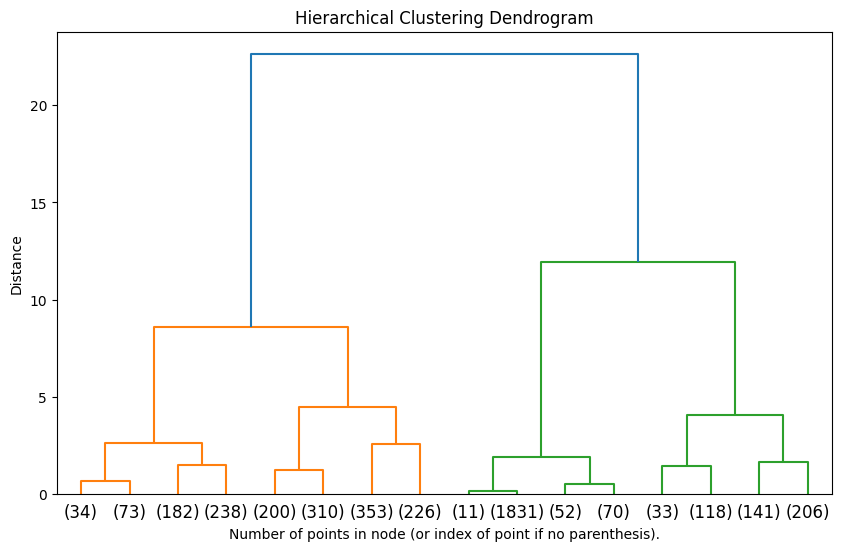

Cluster 0 Titles:
1. Norway's Oil Industry Resumes Helicopter Flights After Deadly Crash - Offshore Engineer

Cluster 1 Titles:
1. Great Elm Capital Corp. (NASDAQ:GECC) Q4 2023 Earnings Call Transcript - Yahoo Finance

Cluster 2 Titles:
1. What's driving the flood of layoffs in the video game industry? - Fast Company

Cluster 3 Titles:
1. Managing the Energy Transition: Oil & Gas Industry Response | Practical Law The Journal - Reuters

Cluster 4 Titles:
1. Industry Roars Back in Wash100 Popular Vote Rankings & 3 New Faces Enter Race - GovCon Wire



In [ ]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from google.colab import drive
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances

# Mount Google Drive
drive.mount('/content/drive')

# Load NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the CSV file containing the sentiment results
csv_file_path = '/content/drive/MyDrive/DATA/results_sentiment.csv'
df = pd.read_csv(csv_file_path)

# Ensure 'Title' column is present
if 'Title' not in df.columns:
    raise ValueError("The 'Title' column is not present in the DataFrame.")

# Define stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the titles: remove stopwords and lemmatize
def preprocess_text(title):
    tokens = word_tokenize(title.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Title' column
df['Processed_Title'] = df['Title'].apply(preprocess_text)

# Perform sentiment analysis on the preprocessed titles
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(title)['compound'] for title in df['Processed_Title']]
sentiments_array = np.array(sentiments).reshape(-1, 1)

# Apply hierarchical clustering
cluster_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = cluster_model.fit_predict(sentiments_array)

# Find representative titles for each cluster
def representative_titles(cluster_labels, titles, n_representatives=3):
    cluster_representatives = {}
    for cluster_id in np.unique(cluster_labels):
        indices = np.where(cluster_labels == cluster_id)[0]
        cluster_sentiments = sentiments_array[indices]
        centroid_index = np.argmin(np.mean(euclidean_distances(cluster_sentiments, cluster_sentiments), axis=0))
        representative_indices = indices[centroid_index]
        representative_titles = titles.iloc[[representative_indices]]
        cluster_representatives[cluster_id] = representative_titles.tolist()[:n_representatives]
    return cluster_representatives

# Get representative titles for each cluster
representative_clusters = representative_titles(clusters, df['Title'])

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
linkage_matrix = linkage(sentiments_array, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance")
plt.show()

# Print representative titles for each cluster
for cluster_id, titles in representative_clusters.items():
    print(f"Cluster {cluster_id} Titles:")
    for i, title in enumerate(titles, start=1):
        print(f"{i}. {title}")
    print()


# Annex

In [ ]:
## License

This project is licensed under the MIT License - see the [LICENSE](LICENSE) file for details. The MIT License is a permissive license that allows you to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the software, with proper attribution and without warranty.


In [ ]:
# MIT License

# Copyright (c) [2024] [Lean-IQ, Ralf Puehler]

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.